In [17]:
import os
import sys
from pathlib import Path
from matplotlib import gridspec
import matplotlib.pyplot as plt
import osgeo
import pandas as pd

%matplotlib inline

In [18]:
sys.path.append(r"../burntfields")
from poly_to_timeseries import *

In [19]:
#####INPUTS:
#Note: these inputs contain iid and have been stripped from the public repo.
#    (because the code relies on the geographic data for each field which is iid, 
#    there is no way to strip the iid from the dataset and have it still be useful.)
#    The outputs from `get_ts_for_all_pixels` are provided in `data/TSpoly_dataframes`

out_dir = "../out_local"  #Note: this is gitignored. Make this directory of change path. 
data_dir = '../data'

##For ground-verified polygons:
#field_list = os.path.join(data_dir,'TimeSeries','GroundPolys_w_BurnDate.csv')
#sentinel_dir = os.path.join(data_dir,'TimeSeries','Sentinel2019_PolyV4_TSwGround')

## For all field polys:
#field_list = os.path.join(data_dir,'Data_1_input_transformed/lon_lat_bbox_600m.csv')
#planet_dir = os.path.join(data_dir,'imagery','Planet','Planet2019V4_HarmonizedSR_poly')
#sentinel_dir = os.path.join(data_dir,'imagery','Sentinel','Sentinel2019_PolysV4')

## For all digitized polygons:
#field_list = os.path.join(data_dir,'TS_analysis','TS_TrainingPolys_Bbox.csv')
#sentinel_dir = os.path.join(data_dir,'TS_analysis','TSpolysOut_Sentinel')
#planet_dir = os.path.join(data_dir,'TS_analysis','Planet2019_PolyV4_TS')
#sentinel_dir = os.path.join(data_dir,'TimeSeries_Separability','Sentinel2019_PolyV4_TS')
#basma_dir = os.path.join(data_dir,'TimeSeries_Separability',BASMA2019_Poly_TS')

## For tilled fields:
#field_list = os.path.join(data_dir,'TS_analysis','FieldPolys_NoBurn_Tilled.csv')
## note with field_list do not actually need subdirectories. Can use directories for all field polys.
#planet_dir = os.path.join(data_dir,'imagery','Planet','TS_poly_V4_tilled')
## sentinel_dir = os.path.join(data_dir,'imagery','Sentinel',Sentinel2019_TilledFields_PolyV4')

In [21]:
#### To construct a TS dataframe #########################################################################################
##note: for tilled: temporarily changing till and pretill columns in field list to burn and preburn to match code. TODO:make till option in code
#### (Figures are built by reading in pre-built time-series dataframes stored in Data/TSplot_dataframes folder)

#burn_ts = get_ts_for_all_pixels(field_list, sentinel_dir, 9, out_dir, 3, 'SWIR1')
#burn_ts = get_ts_for_all_pixels(field_list, planet_dir, 4, out_dir, 3, 'BAI')

In [22]:
#burnnoburn_df = get_burnNoburn_classes_matched(burn_ts, out_dir)
#separability_measures(burnnoburn_df)
#burnnoburn_sets = get_burnNoburn_classes_unmatched(burn_ts, 3, True)

## Get gap stats

In [23]:
#ts = get_ts_stats_for_polys(planet_dir, field_list)
#avg_avg_delta = sum(ts[0])/len(ts[0])
#avg_max_delta = sum(ts[1])/len(ts[1])
#max_avg_delta = max(ts[0])
#max_max_delta = max(ts[1])
#print(avg_avg_delta,avg_max_delta, max_avg_delta, max_max_delta)

In [20]:
####Get Separability measures (just M for now) for top Planet variables: 
burn_ts0 = pd.read_csv(os.path.join(data_dir,'TSpoly_dataframes','TS_polyData_Sentinel_BASMA_char.csv'), index_col=0)
burn_ts = pd.read_csv(os.path.join(data_dir,'TSpoly_dataframes','TS_polyData_PlanetV4_CI.csv'), index_col=0)
burn_ts2 = pd.read_csv(os.path.join(data_dir,'TSpoly_dataframes','TS_polyData_PlanetV4_BAI.csv'), index_col=0)
burn_ts3 = pd.read_csv(os.path.join(data_dir,'TSpoly_dataframes','TS_polyData_PlanetV4_BareSoil.csv'), index_col=0)
burn_ts4 = pd.read_csv(os.path.join(data_dir,'TSpoly_dataframes','TS_polyData_PlanetV4_nir.csv'), index_col=0)

tsdsb0 = get_ts_for_days_since_burn(burn_ts0, out_dir,8,1,16,False)
tsdsb = get_ts_for_days_since_burn(burn_ts, out_dir,8,1,16,False)
tsdsb2 = get_ts_for_days_since_burn(burn_ts2, out_dir,8,1,16,False)
tsdsb3 = get_ts_for_days_since_burn(burn_ts3, out_dir,8,1,16,False)
tsdsb4 = get_ts_for_days_since_burn(burn_ts4, out_dir,8,1,16,False)

dsbsep0 = separability_ts(tsdsb0)
dsbsep = separability_ts(tsdsb)
dsbsep2 = separability_ts(tsdsb2)
dsbsep3 = separability_ts(tsdsb3)
dsbsep4 = separability_ts(tsdsb4)

           0
1   0.798358
2   0.914145
3   0.647780
4   0.733037
5   0.945976
6   0.803788
7   0.802130
8   0.818770
9   0.885161
10  0.865932
11  0.895398
12  0.815094
13  0.796883
14  0.927972
           0
1   1.793373
2   1.572549
3   1.517752
4   1.304947
5   1.545463
6   1.443873
7   1.378520
8   1.355520
9   1.234643
10  1.138256
11  1.188678
12  1.182681
13  1.233809
14  1.181200
           0
1   0.982540
2   0.806049
3   0.880789
4   0.696436
5   0.872278
6   0.898827
7   0.829393
8   0.810285
9   0.803636
10  0.891410
11  0.769952
12  0.810394
13  0.834775
14  0.918188
           0
1   0.844991
2   0.770645
3   0.662041
4   0.374790
5   0.658120
6   0.424500
7   0.448152
8   0.345360
9   0.323865
10  0.210583
11  0.307294
12  0.243591
13  0.198263
14  0.166469
           0
1   1.942894
2   1.614127
3   1.468264
4   1.134894
5   1.510191
6   1.370441
7   1.253578
8   1.402156
9   1.280742
10  1.536604
11  1.258459
12  1.417231
13  1.406794
14  1.593716


In [5]:
####Get Separability measures (just M for now) for top Sentinel variables: 

#burn_ts6_s = get_ts_for_all_pixels(field_list, sentinel_dir, 9, out_dir, 3, 'CI')
burn_ts_s = pd.read_csv(os.path.join(data_dir,'TSpoly_dataframes','TS_polyData_SentinelV4_NBR2.csv'), index_col=0)
burn_ts2_s = pd.read_csv(os.path.join(data_dir,'TSpoly_dataframes','TS_polyData_SentinelV4_MIRBI.csv'), index_col=0)
burn_ts3_s = pd.read_csv(os.path.join(data_dir,'TSpoly_dataframes','TS_polyData_SentinelV4_BurnScar.csv'), index_col=0)
burn_ts4_s = pd.read_csv(os.path.join(data_dir,'TSpoly_dataframes','TS_polyData_SentinelV4_SWIR1.csv'), index_col=0)
burn_ts5_s = pd.read_csv(os.path.join(data_dir,'TSpoly_dataframes','TS_polyData_SentinelV4_nir.csv'), index_col=0)
burn_ts6_s = pd.read_csv(os.path.join(data_dir,'TSpoly_dataframes','TS_polyData_SentinelV4_CI.csv'), index_col=0)
tsdsb_s = get_ts_for_days_since_burn(burn_ts_s, out_dir,8,1,16,False)
tsdsb2_s = get_ts_for_days_since_burn(burn_ts2_s, out_dir,8,1,16,False)
tsdsb3_s = get_ts_for_days_since_burn(burn_ts3_s, out_dir,8,1,16,False)
tsdsb4_s = get_ts_for_days_since_burn(burn_ts4_s, out_dir,8,1,16,False)
tsdsb5_s = get_ts_for_days_since_burn(burn_ts5_s, out_dir,8,1,16,False)
tsdsb6_s = get_ts_for_days_since_burn(burn_ts6_s, out_dir,8,1,16,False)
#separability_measures(burnnoburn_df)
dsbsep_s = separability_ts(tsdsb_s)
dsbsep2_s = separability_ts(tsdsb2_s)
#dsbsep3_s = separability_ts(tsdsb3_s)
dsbsep4_s = separability_ts(tsdsb4_s)
dsbsep5_s = separability_ts(tsdsb5_s)
dsbsep6_s = separability_ts(tsdsb6_s)

           0
1   0.472777
2   0.873120
3   0.959729
4   0.862695
5   1.012367
6   0.930364
7   1.136590
8   0.880229
9   0.941540
10  1.025675
11  1.214125
12  1.113328
13  1.068317
14  0.874884
           0
1   1.490826
2   1.679500
3   1.719931
4   1.045790
5   1.680260
6   1.556410
7   1.676101
8   1.433240
9   1.455747
10  1.488471
11  1.696056
12  1.564197
13  1.517389
14  1.330913
           0
1   1.567096
2   1.586315
3   1.424827
4   1.240054
5   1.262756
6   1.338818
7   1.240165
8   1.288319
9   1.139351
10  1.332196
11  1.283218
12  1.170751
13  1.234019
14  1.068914
           0
1   1.835157
2   2.017336
3   1.764158
4   1.909638
5   1.902000
6   1.980051
7   1.850049
8   1.799661
9   1.627717
10  1.931758
11  1.865775
12  1.813512
13  1.899276
14  1.589681
           0
1   1.395152
2   1.674503
3   1.598233
4   1.316443
5   1.362446
6   1.401318
7   1.360057
8   1.536893
9   1.368598
10  1.476741
11  1.387483
12  1.288527
13  1.358587
14  1.332461


## Get pre-post difference

In [6]:
ts_dir = os.path.join(data_dir,'TSpoly_dataframes')
sig_planet_nir = get_burn_signal(ts_dir, sensor='PlanetV4', var='nir', max_days_pre=8, max_days_post=10)
sig_S2_nir = get_burn_signal(ts_dir, sensor='SentinelV4', var='nir', max_days_pre=8, max_days_post=10)
sig_s2_nir_df = pd.DataFrame(sig_S2_nir.items())
sig_planet_nir_df = pd.DataFrame(sig_planet_nir.items())
print(sig_s2_nir_df)

   0            1
0  2  2431.562069
1  3  1987.441358
2  4  1858.886278
3  5  1897.241533
4  6  1696.848545
5  7  1880.524000
6  8  1721.230159
7  9  1702.543825


## Compare pre-post difference to differences before burn (noise vs signal) 

In [7]:
ts_dir = os.path.join(data_dir,'TSpoly_dataframes')
sensor = 'SentinelV4'
var = 'nir'
burn_ts = pd.read_csv(os.path.join(ts_dir,'ts_polyData_{}_{}.csv'.format(sensor,var)),index_col=0)
#sig_dict = get_burn_signal(ts_dir, sensor='SentinelV4', var='nir', max_days_pre=8, max_days_post=10)
#ts = get_ts_for_days_since_burn(burn_ts, out_dir, 8, 3, 4, single_post_obs=False, print_df=False)
pre_burn = burn_ts[(burn_ts.index < 0)]
pre_burn_f = pre_burn.ffill(axis=0)
#ts_t2 = ts_f.copy()
#ts_t2['up_one']=ts_t2.index - 1
#ts_t2.set_index(ts_t2['up_one'], inplace=True)
#diff = ts_t2 - ts_f
#diff.drop(columns=['up_one'],inplace=True)
#pre_burn_diff = get_image_diffs(pre_burn)
#false_sig_pre = get_false_signals(pre_burn_diff, sig_dict)
pre_burn_f.tail(n=20)

,AVG_1,AVG_2,AVG_3,AVG_4,AVG_5,AVG_6,AVG_7,AVG_8,AVG_9,AVG_10,...,AVG_2196,AVG_2197,AVG_2198,AVG_2199,AVG_2200,AVG_2201,AVG_2202,AVG_2203,AVG_2204,AVG_2205
-20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4248.000000,3886.666667,3450.0,3988.333333,4290.000000,3813.000000,4397.000000,3237.000000,4213.666667,3536.333333
-19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4248.000000,3886.666667,3450.0,3988.333333,4290.000000,3813.000000,4397.000000,3237.000000,4213.666667,3536.333333
-18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4206.666667,3788.333333,3081.0,3727.666667,4259.666667,3421.000000,4312.000000,3241.666667,3874.333333,3253.666667
-17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4206.666667,3788.333333,3081.0,3727.666667,4259.666667,3421.000000,4312.000000,3241.666667,3874.333333,3253.666667
-16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4206.666667,3788.333333,3081.0,3727.666667,4259.666667,3421.000000,4312.000000,3241.666667,3874.333333,3253.666667
-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4206.666667,3788.333333,3081.0,3727.666667,4259.666667,3421.000000,4312.000000,3241.666667,3874.333333,3253.666667
-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4206.666667,3788.333333,3081.0,3727.666667,4259.666667,3421.000000,4312.000000,3241.666667,3874.333333,3253.666667
-13.0,NaN,3674.000000,3667.000000,3280.666667,4216.0,3145.000000,3802.000000,3605.000000,3363.000000,3308.666667,...,3111.333333,2972.666667,2971.0,3271.333333,3951.500000,2920.333333,4042.666667,2965.333333,3366.333333,2817.333333
-12.0,NaN,3674.000000,3667.000000,3280.666667,4216.0,3145.000000,3802.000000,3605.000000,3363.000000,3308.666667,...,3111.333333,2972.666667,2971.0,3271.333333,3951.500000,2920.333333,4042.666667,2965.333333,3366.333333,2817.333333
-11.0,NaN,3674.000000,3667.000000,3280.666667,4216.0,3145.000000,3802.000000,3605.000000,3363.000000,3308.666667,...,3111.333333,2972.666667,2971.0,3271.333333,3951.500000,2920.333333,4042.666667,2965.333333,3366.333333,2817.333333


       AVG_1      AVG_10     AVG_100    AVG_1000    AVG_1001    AVG_1002  \
-51.0    NaN         NaN         NaN         NaN         NaN         NaN   
-50.0    NaN         NaN         NaN         NaN         NaN         NaN   
-49.0    NaN         NaN         NaN         NaN         NaN         NaN   
-48.0    NaN         NaN         NaN         NaN         NaN         NaN   
-47.0    NaN         NaN         NaN         NaN         NaN         NaN   
-46.0    NaN         NaN         NaN         NaN         NaN         NaN   
-45.0    NaN         NaN         NaN         NaN         NaN         NaN   
-44.0    NaN         NaN         NaN         NaN         NaN         NaN   
-43.0    NaN         NaN         NaN         NaN         NaN         NaN   
-42.0    NaN         NaN         NaN         NaN         NaN         NaN   
-41.0    NaN         NaN         NaN         NaN         NaN         NaN   
-40.0    NaN         NaN         NaN         NaN    0.000000    0.000000   
-39.0    NaN

       AVG_1      AVG_10     AVG_100     AVG_1000    AVG_1001    AVG_1002  \
-51.0    NaN         NaN         NaN          NaN         NaN         NaN   
-50.0    NaN         NaN         NaN          NaN         NaN         NaN   
-49.0    NaN         NaN         NaN          NaN         NaN         NaN   
-48.0    NaN         NaN         NaN          NaN         NaN         NaN   
-47.0    NaN         NaN         NaN          NaN         NaN         NaN   
-46.0    NaN         NaN         NaN          NaN         NaN         NaN   
-45.0    NaN         NaN         NaN          NaN         NaN         NaN   
-44.0    NaN         NaN         NaN          NaN         NaN         NaN   
-43.0    NaN         NaN         NaN          NaN         NaN         NaN   
-42.0    NaN         NaN         NaN          NaN         NaN         NaN   
-41.0    NaN         NaN         NaN          NaN         NaN         NaN   
-40.0    NaN         NaN         NaN          NaN    0.000000    0.000000   

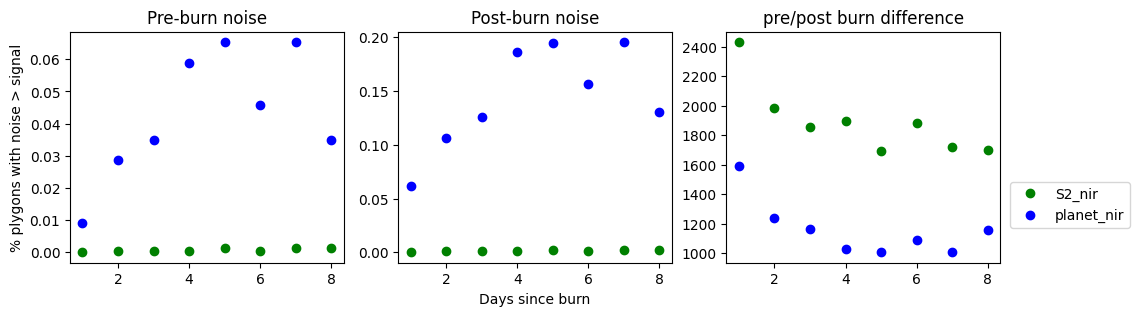

In [8]:
planet_nir_noise_pre, planet_nir_noise_post = get_noise_vs_signal(ts_dir, sensor='PlanetV4', var='nir', max_days_pre=8, max_days_post=10)
S2_nir_noise_pre, S2_nir_noise_post = get_noise_vs_signal(ts_dir, sensor='SentinelV4', var='nir', max_days_pre=8, max_days_post=10)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
ax1.plot(range(1,1+len(S2_nir_noise_pre)),S2_nir_noise_pre, linestyle = 'None', marker='o', color='g', label='S2_nir')
ax1.plot(range(1,1+len(planet_nir_noise_pre)),planet_nir_noise_pre, linestyle = 'None', marker='o', color='b', label='Planet_nir')
ax3.plot(range(1,1+len(sig_s2_nir_df[1])),sig_s2_nir_df[1], linestyle = 'None', marker='o', color='g', label='S2_nir')
ax3.plot(range(1,1+len(sig_s2_nir_df[1])),sig_planet_nir_df[1], linestyle = 'None', marker='o', color='b', label='planet_nir')
ax2.plot(range(1,1+len(planet_nir_noise_post)),planet_nir_noise_post, linestyle = 'None', marker='o', color='b', label='Planet_nir')
ax2.plot(range(1,1+len(S2_nir_noise_post)),S2_nir_noise_post, linestyle = 'None', marker='o', color='g', label='S2_nir')
ax1.set_title ("Pre-burn noise")
ax2.set_title ("Post-burn noise")
ax3.set_title ("pre/post burn difference")
ax1.set_ylabel ('% plygons with noise > signal')
ax2.set_xlabel ('Days since burn')
plt.legend(bbox_to_anchor=(1, 0, 0.5, 0.5), loc='right');

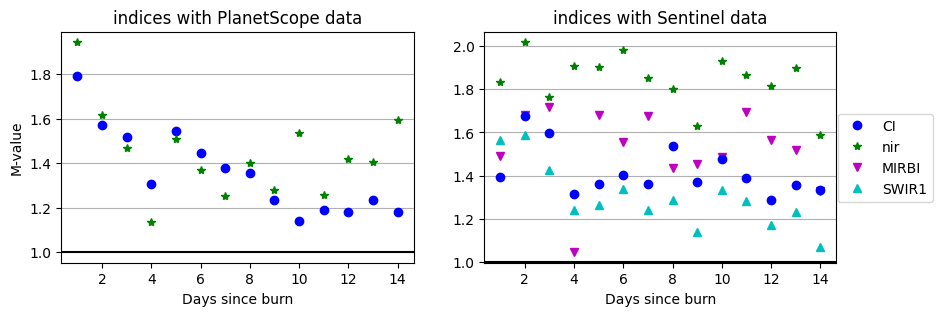

In [9]:
#### Plot TS for Sentinel & Planet variables 
#fig = plt.figure(figsize=(7, 5))
#plt.subplot(1, 2, 1)
#plt.figure(figsize=(7, 5))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.plot(dsbsep.index,dsbsep[0], linestyle = 'None', marker='o', color='b', label='CI')
#ax1.plot(dsbsep0.index,dsbsep0[0], linestyle = 'None', marker='^', color='m', label='BASMA_char')
#ax1.plot(dsbsep2.index,dsbsep2[0], linestyle = 'None', marker='v', label='BAI')
#ax1.plot(dsbsep3.index,dsbsep3[0], linestyle = 'None', marker='s', label='BareSoil')
ax1.plot(dsbsep4.index,dsbsep4[0], linestyle = 'None', marker='*', color='g', label='nir')
ax1.axhline(y = 1, color = 'k', linestyle = '-')
ax1.set_title ("indices with PlanetScope data")
ax1.set_ylabel ('M-value')
ax1.set_xlabel ('Days since burn')
ax1.grid(axis='y')
#ax1.legend(loc='lower left')

#ax2.plot(dsbsep_s.index,dsbsep_s[0], linestyle = 'None', marker='o', label='NBR2')
ax2.plot(dsbsep2_s.index,dsbsep2_s[0], linestyle = 'None', marker='v', color='m', label='MIRBI')
#ax2.plot(dsbsep3_S.index,dsbsep3_S[0], linestyle = 'None', marker='s', label='BurnScar')
ax2.plot(dsbsep4_s.index,dsbsep4_s[0], linestyle = 'None', marker='^', color='c', label='SWIR1')
ax2.plot(dsbsep5_s.index,dsbsep5_s[0], linestyle = 'None', marker='*', color='g') #This is nir. No label due to shared legend
ax2.plot(dsbsep6_s.index,dsbsep6_s[0], linestyle = 'None', marker='o', color='b') #This is CI. No label due to shared legend
ax2.axhline(y = 1, color = 'k', linestyle = '-')
ax2.set_title ("indices with Sentinel data")
#ax2.set_ylabel ('M-value')
ax2.set_xlabel ('Days since burn')

ax2.grid(axis='y')
#ax2.legend(loc='lower left')

plt.subplots_adjust(wspace=.2);

fig.legend(loc='right')

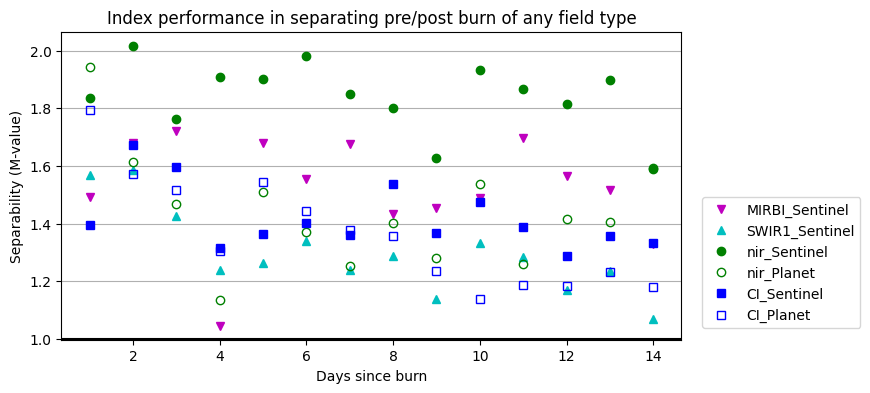

In [10]:
#### Same as above as a single plot:
plt.figure(figsize=(8, 4))
plt.plot(dsbsep2_s.index,dsbsep2_s[0], linestyle = 'None', marker='v', color='m', label='MIRBI_Sentinel')
plt.plot(dsbsep4_s.index,dsbsep4_s[0], linestyle = 'None', marker='^', color='c', label='SWIR1_Sentinel')
plt.plot(dsbsep5_s.index,dsbsep5_s[0], linestyle = 'None', marker='o', color='g', label='nir_Sentinel') 
plt.plot(dsbsep4.index,dsbsep4[0], linestyle = 'None', marker='o', color='g', markerfacecolor='none', label='nir_Planet')
plt.plot(dsbsep6_s.index,dsbsep6_s[0], linestyle = 'None', marker='s', color='b', label ='CI_Sentinel')
plt.plot(dsbsep.index,dsbsep[0], linestyle = 'None', marker='s', color='b', markerfacecolor='none', label='CI_Planet')
plt.axhline(y = 1, color = 'k', linestyle = '-')
plt.title ("Index performance in separating pre/post burn of any field type", fontsize=12)
plt.ylabel ('Separability (M-value)', fontsize=10)
plt.xlabel ('Days since burn', fontsize=10)
plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1, 1, 0.3, -1.5), loc='right');

In [11]:
####Get Separability measures (just M for now) for top Planet variables: 
burn_ts_g = pd.read_csv(os.path.join(data_dir,'TSpoly_dataframes','TSwGround_polyData_Planet_CI.csv'), index_col=0)
burn_ts_g4 = pd.read_csv(os.path.join(data_dir,'TSpoly_dataframes','TSwGround_polyData_Planet_nir.csv'), index_col=0)

tsdsbg = get_ts_for_days_since_burn(burn_ts_g, out_dir,8,1,16,False)
tsdsbg4 = get_ts_for_days_since_burn(burn_ts_g4, out_dir,8,1,16,False)

dsbgsep = separability_ts(tsdsbg)
dsbgsep4 = separability_ts(tsdsbg4)

#burn_ts6_s = get_ts_for_all_pixels(field_list, sentinel_dir, 9, out_dir, 3, 'CI')
burn_ts_g2_s = pd.read_csv(os.path.join(data_dir,'TSpoly_dataframes','TSwGround_polyData_SentinelV4_MIRBI.csv'), index_col=0)
burn_ts_g4_s = pd.read_csv(os.path.join(data_dir,'TSpoly_dataframes','TSwGround_polyData_SentinelV4_SWIR1.csv'), index_col=0)
burn_ts_g5_s = pd.read_csv(os.path.join(data_dir,'TSpoly_dataframes','TSwGround_polyData_Sentinel_nir.csv'), index_col=0)
burn_ts_g6_s = pd.read_csv(os.path.join(data_dir,'TSpoly_dataframes','TSwGround_polyData_Sentinel_CI.csv'), index_col=0)

tsdsbg2_s = get_ts_for_days_since_burn(burn_ts_g2_s, out_dir,8,1,16,False)
tsdsbg4_s = get_ts_for_days_since_burn(burn_ts_g4_s, out_dir,8,1,16,False)
tsdsbg5_s = get_ts_for_days_since_burn(burn_ts_g5_s, out_dir,8,1,16,False)
tsdsbg6_s = get_ts_for_days_since_burn(burn_ts_g6_s, out_dir,8,1,16,False)
#SeparabilityMeasures(BurnNoBurnDF)
dsbgsep2_s = separability_ts(tsdsbg2_s)
dsbgsep4_s = separability_ts(tsdsbg4_s)
dsbgsep5_s = separability_ts(tsdsbg5_s)
dsbgsep6_s = separability_ts(tsdsbg6_s)

           0
1   0.960009
2   1.193756
3   0.924310
4   1.189786
5   0.973955
6   1.137829
7   0.943772
8   1.103791
9   1.126787
10  0.886443
11  0.875505
12  0.941316
13  1.043640
14  1.167847
           0
1   1.157621
2   1.259651
3   1.150082
4   1.538803
5   1.376052
6   1.228948
7   1.346067
8   1.360447
9   1.264215
10  1.715859
11  1.383337
12  1.296654
13  1.391594
14  1.261805
           0
1   2.335987
2   1.530977
3   1.138807
4   2.093977
5   2.138188
6        NaN
7   2.144041
8   1.777486
9   1.652860
10       NaN
11  3.715595
12  2.009374
13  2.457713
14  1.476866
           0
1   2.023222
2   1.120704
3   0.990260
4   1.217236
5   1.729818
6        NaN
7   1.626294
8   1.148867
9   1.005466
10       NaN
11  2.035940
12  1.455046
13  1.650295
14  1.242295
           0
1   2.069223
2   1.175611
3   0.875356
4   1.510463
5   1.592830
6        NaN
7   1.328933
8   1.398108
9   1.268776
10       NaN
11  2.908751
12  1.623890
13  1.671124
14  1.036908
           0
1   2.097195

## Plot TS for ground polys (known rice paddys) with burn date observed in Planet

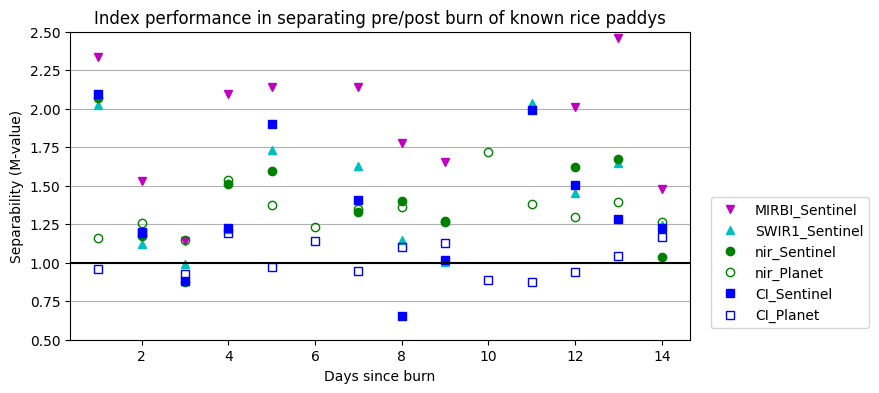

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(dsbgsep2_s.index,dsbgsep2_s[0], linestyle = 'None', marker='v', color='m', label='MIRBI_Sentinel')
plt.plot(dsbgsep4_s.index,dsbgsep4_s[0], linestyle = 'None', marker='^', color='c', label='SWIR1_Sentinel')
plt.plot(dsbgsep5_s.index,dsbgsep5_s[0], linestyle = 'None', marker='o', color='g', label='nir_Sentinel') 
plt.plot(dsbgsep4.index,dsbgsep4[0], linestyle = 'None', marker='o', color='g', markerfacecolor='none', label='nir_Planet')
plt.plot(dsbgsep6_s.index,dsbgsep6_s[0], linestyle = 'None', marker='s', color='b', label ='CI_Sentinel')
plt.plot(dsbgsep.index,dsbgsep[0], linestyle = 'None', marker='s', color='b', markerfacecolor='none', label='CI_Planet')
plt.axhline(y = 1, color = 'k', linestyle = '-')
plt.title ("Index performance in separating pre/post burn of known rice paddys", fontsize=12)
plt.ylabel ('Separability (M-value)', fontsize=10)
plt.xlabel ('Days since burn', fontsize=10)
plt.grid(axis='y')
plt.ylim(.5,2.5)
plt.legend(bbox_to_anchor=(1, 1, 0.3, -1.5), loc='right');

## Compare separability of tilled vs. burned

In [13]:
def get_band_vals_tilled_vs_burned(data_dir,poly_source,band_type,index_bands=[],startnum=0):
    '''
    Gets average & stdv of each band for each datasource (Sentinel | Planet) 
    for sample No_burn polygons seen up to 8 days post-till,
    sample burn polygons seen up 1-3 days post till (as 'newBurn'),
    and sample burn polygons seen 5-9 days post till (as 'oldBurn')
    '''    
    
    if 'Sentinel' in poly_source:
        if band_type == 'raw':
            bands = ['blue','green','red','redEdge1','redEdge2','redEdge3','nir','SWIR1','SWIR2']
        elif band_type == 'index':
            bands = index_bands
    elif 'Planet' in poly_source:
        if band_type == 'raw':
            bands = ['blue','green','red','nir']
        elif band_type == 'index':
            bands = index_bands
    else:
        print('polySource needs to contain Sentinel or Planet')
    
    for idx, b in enumerate(bands):
        tilled_df = pd.read_csv(os.path.join(data_dir,'TSTilled_polyData_'+poly_source+'_'+b+'.csv'), index_col=0)
        burned_df = pd.read_csv(os.path.join(data_dir,'TS_polyData_'+poly_source+'_'+b+'.csv'), index_col=0)
        if idx == 0:
            allbands_tilled = get_ts_for_days_since_burn(tilled_df, out_dir, 8, 1, 8,True)
            allbands_tilled.drop('Pre',axis=1,inplace=True)
            allbands_tilled.rename({'Post' : idx+startnum}, axis=1, inplace=True)
        
            allbands_burned_new = get_ts_for_days_since_burn(burned_df, out_dir, 3, 1, 3,True)
            allbands_burned_new.drop('Pre',axis=1,inplace=True)
            allbands_burned_new.rename({'Post' : idx+startnum -.1}, axis=1, inplace=True)
        
            allbands_burned_old = get_ts_for_days_since_burn(burned_df, out_dir, 3, 5, 9,True)
            allbands_burned_old.drop('Pre',axis=1,inplace=True)
            allbands_burned_old.rename({'Post' : idx+startnum +.1}, axis=1, inplace=True)
        else:
            tilled_band = get_ts_for_days_since_burn(tilled_df, out_dir, 8, 1, 8,True)
            tilled_band.drop('Pre',axis=1,inplace=True)
            tilled_band.rename({'Post' : idx+startnum}, axis=1, inplace=True)
            allbands_tilled = pd.concat([allbands_tilled, tilled_band], axis=1)
        
            burned_new_band = get_ts_for_days_since_burn(burned_df, out_dir, 3, 1, 3,True)
            burned_new_band.drop('Pre',axis=1,inplace=True)
            burned_new_band.rename({'Post' : idx+startnum -.1}, axis=1, inplace=True)
            allbands_burned_new = pd.concat([allbands_burned_new, burned_new_band], axis=1)
        
            burned_old_band = get_ts_for_days_since_burn(burned_df, out_dir, 3, 5, 9,True)
            burned_old_band.drop('Pre',axis=1,inplace=True)
            burned_old_band.rename({'Post' : idx+startnum +.1}, axis=1, inplace=True)
            allbands_burned_old = pd.concat([allbands_burned_old, burned_old_band], axis=1)

    allbands_tilled.dropna(inplace=True)
    allbands_tilled = allbands_tilled.T
    allbands_tilled['Tilled_ALL'] = allbands_tilled.mean(axis=1)
    allbands_tilled['Tilled_stdv'] = allbands_tilled.std(axis=1)
    allbands_t = allbands_tilled[['Tilled_ALL','Tilled_stdv']]

    allbands_burned_new.dropna(inplace=True)
    allbands_burned_new = allbands_burned_new.T
    allbands_burned_new['BurnedNew_ALL'] = allbands_burned_new.mean(axis=1)
    allbands_burned_new['BurnedNew_stdv'] = allbands_burned_new.std(axis=1)
    allbands_bn = allbands_burned_new[['BurnedNew_ALL','BurnedNew_stdv']]

    allbands_burned_old.dropna(inplace=True)
    allbands_burned_old = allbands_burned_old.T
    allbands_burned_old['BurnedOld_ALL'] = allbands_burned_old.mean(axis=1)
    allbands_burned_old['BurnedOld_stdv'] = allbands_burned_old.std(axis=1)
    allbands_bo = allbands_burned_old[['BurnedOld_ALL','BurnedOld_stdv']]

    df_all = pd.concat([allbands_t,allbands_bn,allbands_bo],axis=1)
    df_all.sort_index(inplace=True)

    return df_all

In [14]:
data_dir = ('../data/TSpoly_dataframes')
#s_bands_i = ['ndvi','NBR','NBR2','CI','BAIS','MIRBI']
df_all_sentinel_i = get_band_vals_tilled_vs_burned(data_dir,'SentinelV4','index',['CI','BAIS','ndvi'])
t_ci = get_band_vals_tilled_vs_burned(data_dir,'PlanetV4','index',['CI','BAI'],3)
all_i = pd.concat([df_all_sentinel_i,t_ci])
all_i

,Tilled_ALL,Tilled_stdv,BurnedNew_ALL,BurnedNew_stdv,BurnedOld_ALL,BurnedOld_stdv
-0.1,NaN,NaN,5704.946679,3320.535343,NaN,NaN
0.0,10827.631807,3481.336516,NaN,NaN,NaN,NaN
0.1,NaN,NaN,NaN,NaN,7755.621821,2219.805312
0.9,NaN,NaN,10236.852834,1058.809007,NaN,NaN
1.0,9975.683676,676.586947,NaN,NaN,NaN,NaN
1.1,NaN,NaN,NaN,NaN,10344.000611,777.071196
1.9,NaN,NaN,2255.380522,947.608417,NaN,NaN
2.0,2363.546119,963.798789,NaN,NaN,NaN,NaN
2.1,NaN,NaN,NaN,NaN,1569.829023,514.318729
2.9,NaN,NaN,4521.094606,1135.712270,NaN,NaN


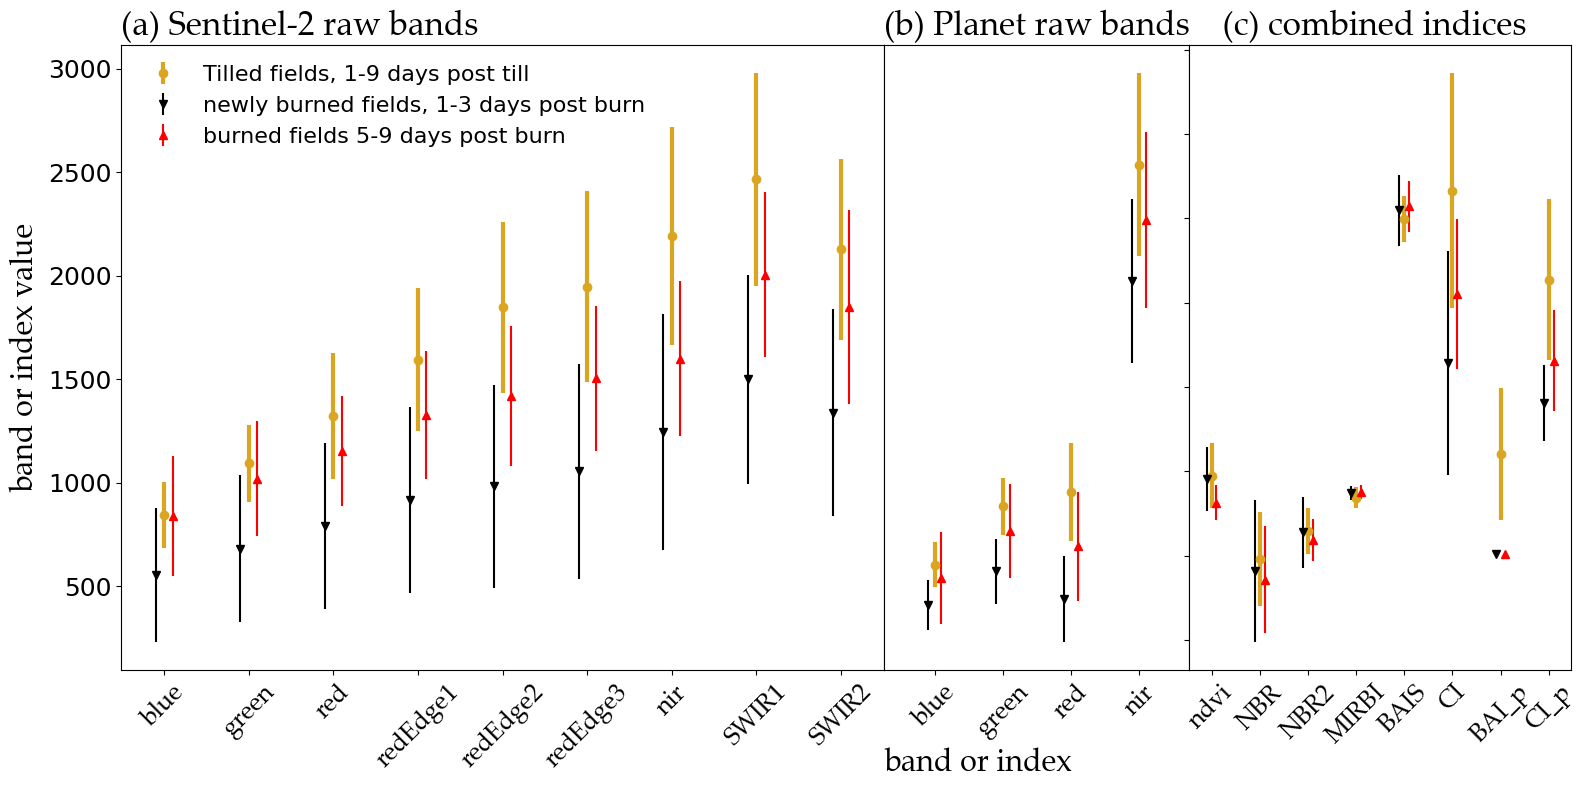

In [15]:
data_dir = ('../data/TSpoly_dataframes')
### Note: this is copied to burntfields/Data/TimeSeries/TSpoly_dataframes

### DFs already created and stored in DataDir as 'TS_polyData_<polySource>_<band>.csv' for burned samples
###    or 'TSTilled_polyData_<polySource>_<band>.csv' for Tilled samples.
###    to create new DF, use: Get_TS_for_All_Pixels(field_list, Sentinel_dir, 9, out_dir, 3, 'SWIR2') etc.
###         note: for tilled, may need to change till and pretill columns in field list to burn and preburn to match code 
###           (probably already done). 

df_all_sentinel = get_band_vals_tilled_vs_burned(data_dir,'SentinelV4','raw')
s_bands = ['blue','green','red','redEdge1','redEdge2','redEdge3','nir','SWIR1','SWIR2']

df_all_planet = get_band_vals_tilled_vs_burned(data_dir,'PlanetV4','raw')
p_bands = ['blue','green','red','nir']

s_bands_i = ['ndvi','NBR','NBR2','MIRBI','BAIS','CI']
p_bands_i = ['BAI_p','CI_p']
df_all_sentinel_i = get_band_vals_tilled_vs_burned(data_dir,'SentinelV4','index',s_bands_i,0)
df_all_planet_i = get_band_vals_tilled_vs_burned(data_dir,'PlanetV4','index',['BAI','CI'],len(s_bands_i))
df_all_indices = pd.concat([df_all_sentinel_i,df_all_planet_i])
bands_i = s_bands_i + p_bands_i

fig = plt.figure(figsize=(16, 8)) 
#fig, (a0, a1) = plt.subplots(1, 2, width_ratios=[2, 1]) #This should work with more recent MatPlotLib
gs = gridspec.GridSpec(1, 3, width_ratios=[2, .8, 1], wspace=0)

a0 = plt.subplot(gs[0])
a0.errorbar(df_all_sentinel.index, df_all_sentinel['Tilled_ALL'], yerr=df_all_sentinel['Tilled_stdv'], fmt='o', color='goldenrod', linewidth=3, label='Tilled fields, 1-9 days post till')
a0.errorbar(df_all_sentinel.index, df_all_sentinel['BurnedNew_ALL'], yerr=df_all_sentinel['BurnedNew_stdv'], fmt='v', color='black', label='newly burned fields, 1-3 days post burn')
a0.errorbar(df_all_sentinel.index, df_all_sentinel['BurnedOld_ALL'], yerr=df_all_sentinel['BurnedOld_stdv'], fmt='^', color='r', label='burned fields 5-9 days post burn')
a0.set_xticks(range(len(s_bands)), minor=False)
a0.set_xticklabels(s_bands, fontdict=None, minor=False, fontname='Palatino Linotype')
a0.set_ylabel('band or index value', fontsize = 22, fontname='Palatino Linotype') 
a0.tick_params(axis='x', labelrotation=45, labelsize=18)
a0.set_title('(a) Sentinel-2 raw bands', fontsize="24", loc='left', fontname='Palatino Linotype')
a0.legend(loc='upper left', fontsize="16", frameon=False)
a0.tick_params(axis='y', labelsize=18)

a1 = plt.subplot(gs[1])
a1.errorbar(df_all_planet.index,df_all_planet['Tilled_ALL'], yerr=df_all_planet['Tilled_stdv'], fmt='o', color='goldenrod', linewidth=3, label='Tilled fields, 1-9 days post till')
a1.errorbar(df_all_planet.index, df_all_planet['BurnedNew_ALL'], yerr=df_all_planet['BurnedNew_stdv'], fmt='v', color='black', label='newly burned fields, 1-3 days post burn')
a1.errorbar(df_all_planet.index, df_all_planet['BurnedOld_ALL'], yerr=df_all_planet['BurnedOld_stdv'], fmt='^', color='r', label='burned fields 5-9 days post burn')
a1.set_xticks(range(len(p_bands)), minor=False)
a1.set_xticklabels(p_bands, fontdict=None, minor=False, fontname='Palatino Linotype')
a1.set(yticklabels=[])
a1.set(ylabel=None)
a1.set_title('(b) Planet raw bands', fontsize="24", loc='left', fontname='Palatino Linotype')
a1.tick_params(axis='x', labelrotation=45, labelsize=18)
a1.margins(x=0.2)
a1.set_xlabel('band or index', fontsize="22", loc='left', fontname='Palatino Linotype')
a1.tick_params(left=False)

a2 = plt.subplot(gs[2])
a2.errorbar(df_all_indices.index, df_all_indices['Tilled_ALL'], yerr=df_all_indices['Tilled_stdv'], fmt='o', color='goldenrod', linewidth=3, label='Tilled fields, 1-9 days post till')
a2.errorbar(df_all_indices.index, df_all_indices['BurnedNew_ALL'], yerr=df_all_indices['BurnedNew_stdv'], fmt='v', color='black', label='newly burned fields, 1-3 days post burn')
a2.errorbar(df_all_indices.index, df_all_indices['BurnedOld_ALL'], yerr=df_all_indices['BurnedOld_stdv'], fmt='^', color='r', label='burned fields 5-9 days post burn')
a2.set_xticks(range(len(bands_i)), minor=False)
a2.set_xticklabels(bands_i, fontdict=None, minor=False, fontname='Palatino Linotype')
a2.set(yticklabels=[])
a2.set(ylabel=None)
a2.set_title('    (c) combined indices', fontsize = 24, loc='left', fontname='Palatino Linotype')
a2.tick_params(axis='x', labelrotation=45, labelsize=18)

plt.tight_layout();
#plt.savefig('grid_figure.pdf');

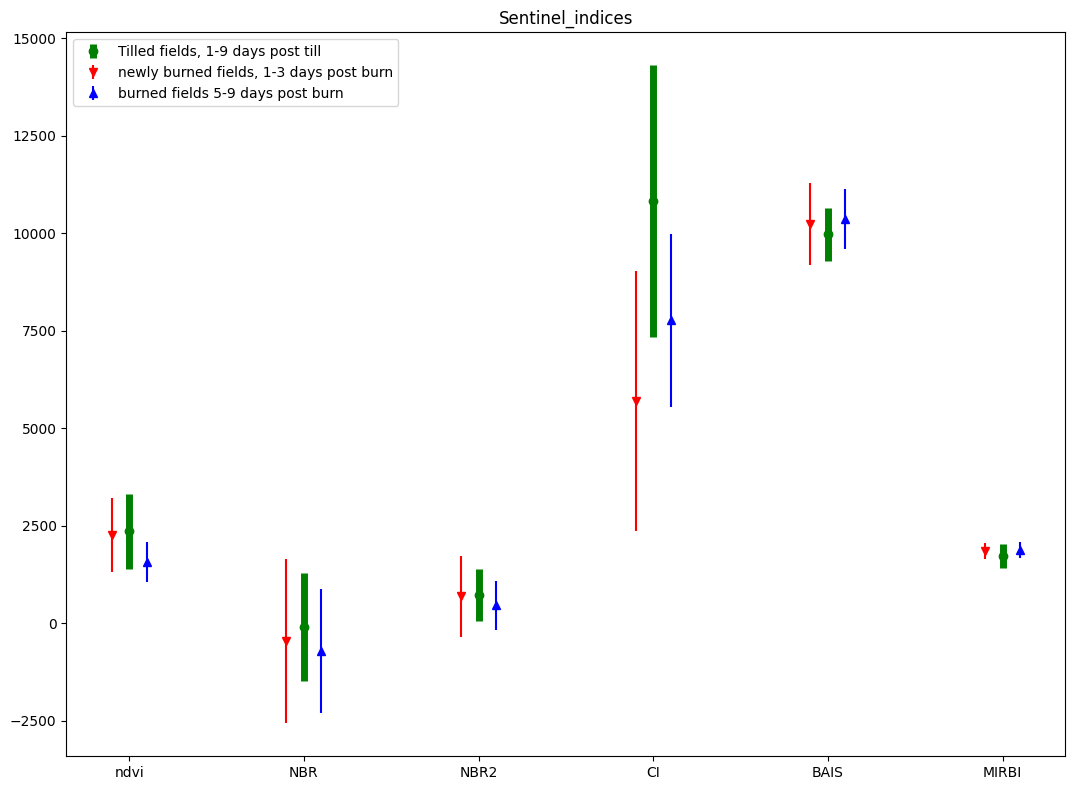

In [16]:
sbands = ['ndvi','NBR','NBR2','CI','BAIS','MIRBI']
dfall_sentinel = get_band_vals_tilled_vs_burned(data_dir,'SentinelV4','index',sbands)
 
#dfall_planet = GetBandVals_TilledVSBurned(DataDir,'PlanetV4')
#Pbands = ['blue','green','red','nir']

fig = plt.figure(figsize=(16, 8)) 
#fig, (a0, a1) = plt.subplots(1, 2, width_ratios=[2, 1]) #This should work with more recent MatPlotLib
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

a0 = plt.subplot(gs[0])
a0.errorbar(dfall_sentinel.index, dfall_sentinel['Tilled_ALL'], yerr=dfall_sentinel['Tilled_stdv'], fmt='o', color='g', linewidth=5, label='Tilled fields, 1-9 days post till')
a0.errorbar(dfall_sentinel.index, dfall_sentinel['BurnedNew_ALL'], yerr=dfall_sentinel['BurnedNew_stdv'], fmt='v', color='r', label='newly burned fields, 1-3 days post burn')
a0.errorbar(dfall_sentinel.index, dfall_sentinel['BurnedOld_ALL'], yerr=dfall_sentinel['BurnedOld_stdv'], fmt='^', color='b', label='burned fields 5-9 days post burn')
a0.set_xticks(range(len(sbands)), minor=False)
a0.set_xticklabels(sbands, fontdict=None, minor=False)
a0.set_title('Sentinel_indices')
#a0.xlabel('Band', fontsize=12)
a0.legend(loc='upper left')

#a1 = plt.subplot(gs[1])
#a1.errorbar(dfall_planet.index, dfall_planet['Tilled_ALL'], yerr=dfall_planet['Tilled_stdv'], fmt='o', color='g', label='Tilled fields, 1-9 days post till')
#a1.errorbar(dfall_planet.index, dfall_planet['BurnedNew_ALL'], yerr=dfall_planet['BurnedNew_stdv'], fmt='o', color='r', label='newly burned fields, 1-3 days post burn')
#a1.errorbar(dfall_planet.index, dfall_planet['BurnedOld_ALL'], yerr=dfall_planet['BurnedOld_stdv'], fmt='o', color='b', label='burned fields 5-9 days post burn')
#a1.set_xticks(range(len(Pbands)), minor=False)
#a1.set_xticklabels(Pbands, fontdict=None, minor=False)
#a1.set(yticklabels=[])
#a1.set(ylabel=None)
#a1.set_title('Planet_rawBands')
#a1.tick_params(left=False)

plt.tight_layout();
#plt.savefig('grid_figure.pdf');